In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import os
pathResults = os.path.join("/ArableLandSuitability", "results", "feature_importance")
path_to_pkls = os.path.join("/ArableLandSuitability", "data", "processed_files", "pkls")

In [2]:
morf_map = {"1": "slope",
                "2": "aspect",
                "3": "shaded relief\neast",
                "4": "profile\nconvexity",
                "5": "plan\nconvexity",
                "6": "long\ncurvature",
                "7": "section\nconvexity",
                "8": "minimum\ncurvature",
                "9": "maximum\ncurvature",
                "10": "shaded relief\nsouth"}

In [3]:
with open(os.path.join(path_to_pkls, "keys_lstm.pkl"), "rb") as fp:
    lstm_keys = pickle.load(fp)
lstm_keys = [x for x in lstm_keys if "morf" not in x]
morf_keys = [value for value in morf_map.values()]
keys = lstm_keys + morf_keys

In [63]:
morf_keys

['slope',
 'aspect',
 'shaded relief\neast',
 'profile\nconvexity',
 'plan\nconvexity',
 'long\ncurvature',
 'section\nconvexity',
 'minimum\ncurvature',
 'maximum\ncurvature',
 'shaded relief\nsouth']

### LSTM

In [109]:
with open(
os.path.join(pathResults, "feature_importance_lstm.pkl"), "rb"
) as fs:
    scores = pickle.load(fs)
scores_lstm = {k:[] for k in keys}

# Average over all permutations:
for key, value in scores.items():
    value = np.mean(scores[key])

    # Rename morphological features
    if any(morf in key for morf in ["morf_3", "morf_11", "morf_33", "morf_47"]):
        key_index = key.split("_")[2]
        key = morf_map[key_index]
        # key = band_names[key_index]+"_"+key_scale

    # Collect all similar features in list (12 values for climatic, 4 - for morphological)
    for key_res, value_res in scores_lstm.items():
        if key_res in key:
            value_res.append(value)

# Sum up values from 1 features (12 values for climatic, 4 - for morphological)
for key, value in scores_lstm.items():
    if key in morf_keys:
        scores_lstm[key] = np.sum(scores_lstm[key])
    else:
        scores_lstm[key] = np.sum(scores_lstm[key])

Text(0, 0.5, 'F1-score diffference \nwith features permuted')

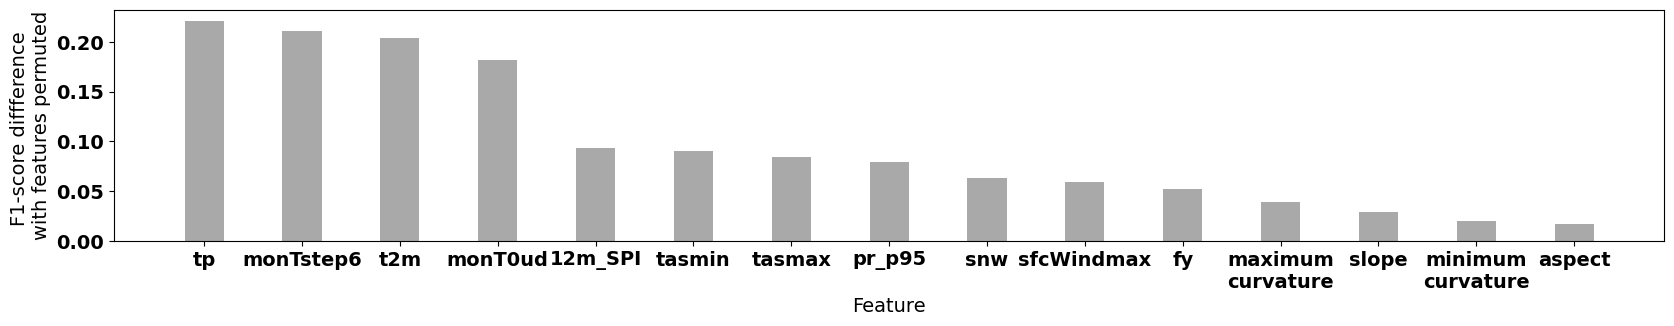

In [65]:
lstm_feature_importance = pd.DataFrame(data= scores_lstm.values(), index = scores_lstm.keys(), columns=['LSTM'])
lstm_feature_importance = lstm_feature_importance.sort_values(by=['LSTM'], ascending=False)

plt.figure(figsize=(20,3))
plt.bar(list(lstm_feature_importance[:15].index), [i[0] for i in lstm_feature_importance[:15].values], width=0.4, color = 'darkgray')
plt.xlabel("Feature")
plt.ylabel("F1-score diffference \nwith features permuted")

### MLP. Monthly features

In [107]:
with open(
os.path.join(pathResults, "feature_importance_MLP.pkl"), "rb"
) as fs:
    scores = pickle.load(fs)
scores_mlp = {k:[] for k in keys}

# Average over all permutations:
for key, value in scores.items():
    # Average over permutations
    value = np.mean(scores[key])

    # Rename morphological features
    if any(morf in key for morf in ["morf_3", "morf_11", "morf_33", "morf_47"]):
        key_index = key.split("_")[2]
        key = morf_map[key_index]+ key.split("_")[1]

    # Collect all similar features in list (12 values for climatic, 4 - for morphological)
    for key_res, value_res in scores_mlp.items():
        if key_res in key:
            value_res.append(value)

# Sum up values from 1 features (12 values for climatic, 4 - for morphological)
for key, value in scores_mlp.items():
    if key in morf_keys:
        scores_mlp[key] = np.sum(scores_mlp[key])
    else:
        scores_mlp[key] = np.sum(scores_mlp[key])

Text(0, 0.5, 'F1-score diffference \nwith features permuted')

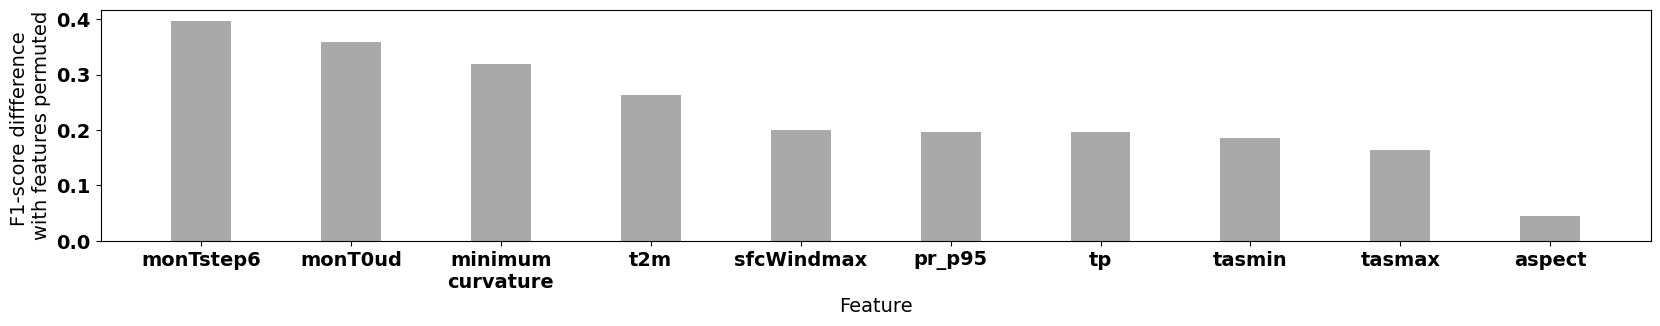

In [108]:
mlp_feature_importance = pd.DataFrame(data= scores_mlp.values(), index = scores_mlp.keys(), columns=['MLP'])
mlp_feature_importance = mlp_feature_importance.sort_values(by=['MLP'], ascending=False)

plt.figure(figsize=(20,3))
plt.bar(list(mlp_feature_importance[:10].index), [i[0] for i in mlp_feature_importance[:10].values], width=0.4, color = 'darkgray')
plt.xlabel("Feature")
plt.ylabel("F1-score diffference \nwith features permuted")

### Catboost

In [110]:
with open(
os.path.join(pathResults, "feature_importance_catboost.pkl"), "rb"
) as fs:
    scores = pickle.load(fs)
scores_catboost = {k:[] for k in keys}

# Average over all permutations:
for key, value in scores.items():
    value = np.mean(scores[key])

    # Rename morphological features
    if any(morf in key for morf in ["morf_3", "morf_11", "morf_33", "morf_47"]):
        key_index = key.split("_")[2]
        key = morf_map[key_index]
        # key = band_names[key_index]+"_"+key_scale

    # Collect all similar features in list (12 values for climatic, 4 - for morphological)
    for key_res, value_res in scores_catboost.items():
        if key_res in key:
            value_res.append(value)

# Sum up values from 1 features (12 values for climatic, 4 - for morphological)
for key, value in scores_catboost.items():
    if key in morf_keys:
        scores_catboost[key] = np.sum(scores_catboost[key])
    else:
        scores_catboost[key] = np.sum(scores_catboost[key])

Text(0, 0.5, 'F1-score diffference \nwith features permuted')

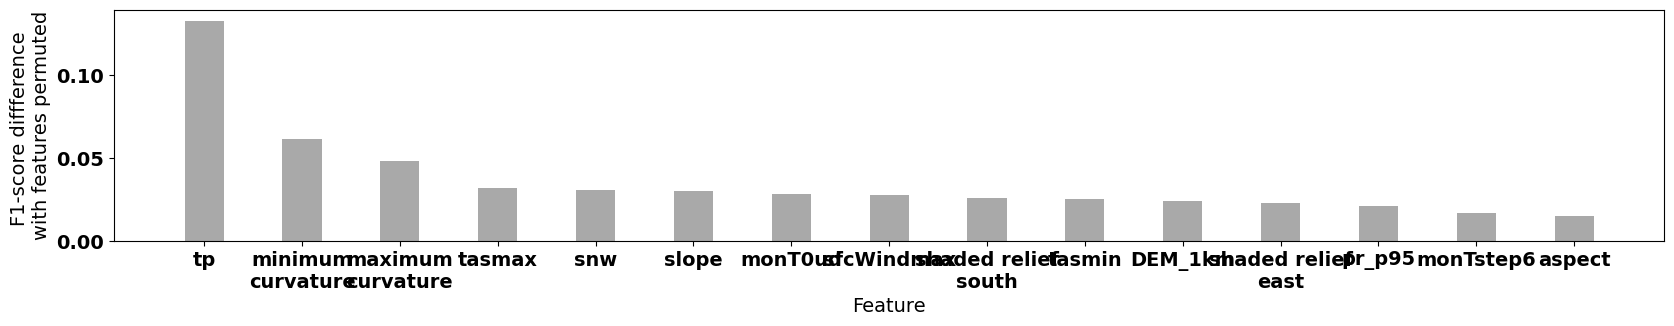

In [111]:
catboost_feature_importance = pd.DataFrame(data= scores_catboost.values(), index = scores_catboost.keys(), columns=['Catboost'])
catboost_feature_importance = catboost_feature_importance.sort_values(by=['Catboost'], ascending=False)

plt.figure(figsize=(20,3))
plt.bar(list(catboost_feature_importance[:15].index), [i[0] for i in catboost_feature_importance[:15].values], width=0.4, color = 'darkgray')
plt.xlabel("Feature")
plt.ylabel("F1-score diffference \nwith features permuted")

### Union of top features

In [24]:
import matplotlib
from matplotlib.ticker import ScalarFormatter
font = {'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [112]:
features = list(set(lstm_feature_importance[:4].index) |
                set(mlp_feature_importance[:4].index) |
                set(catboost_feature_importance[:4].index) )
print(len(features))

7


In [105]:
features = ['tp', 'monTstep6', 'monT0ud', 't2m', 'sfcWindmax',  'tasmax',  'snw']

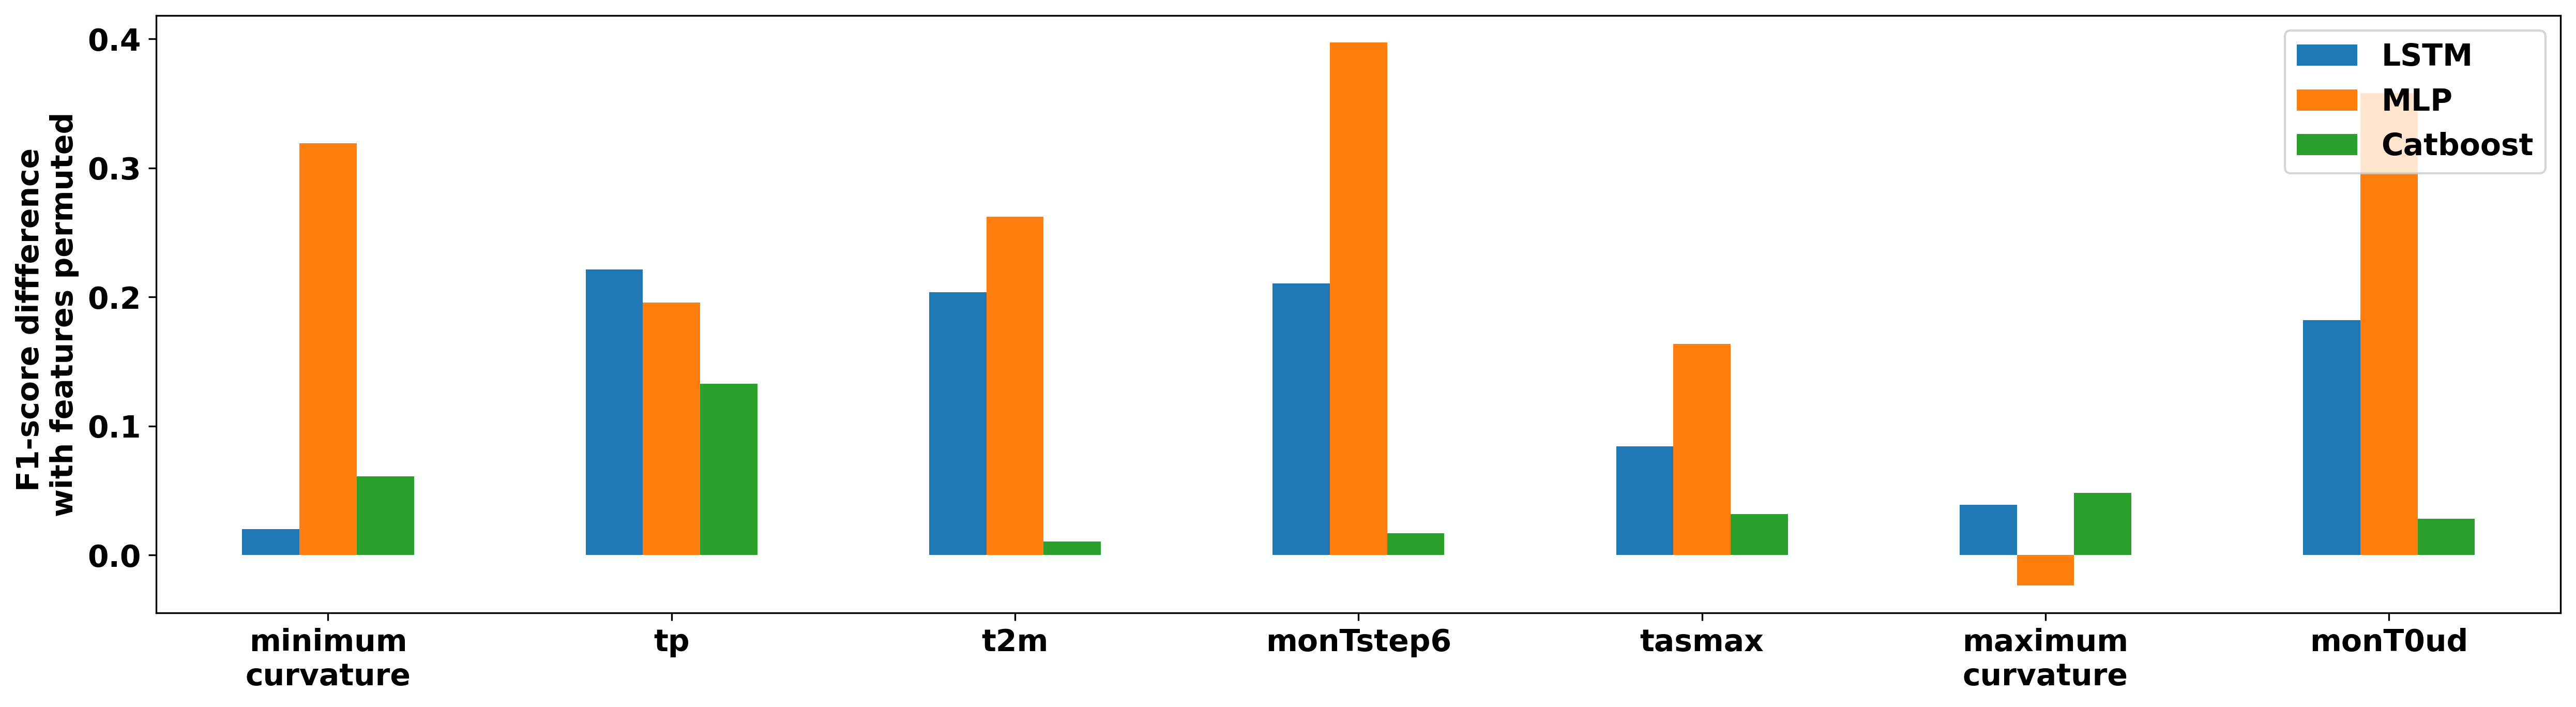

In [113]:
df = pd.merge(lstm_feature_importance, mlp_feature_importance, left_index=True, right_index=True)
df = pd.merge(df, catboost_feature_importance, left_index=True, right_index=True)

df.loc[features].plot(kind='bar', figsize=(20,5), rot=0)

plt.ylabel("F1-score diffference \nwith features permuted", font = font)

# ax = plt.gca()
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.gcf().set_dpi(300)
plt.show()